In [3]:
#German Hernández
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score

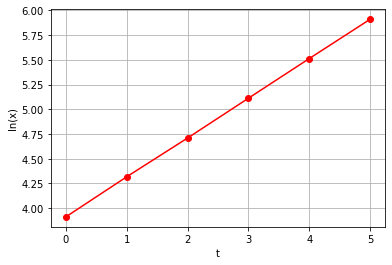

 
0.3995 x + 3.914
R^2 = 0.9999877029911095


In [6]:
#ejercicio 16
t1=np.asarray([0,1,2,3,4,5])
X1=np.asarray([50,75,111,166,248,369])
Int_plot(t1,X1)

In [10]:
#Ejercicio 17
V2=2
S02=10
F2=np.asarray([1,1.4,1.6,1.7,1.8,1.9])
X2=np.asarray([3.15,3.22,3.27,3.26,3.21,3.10])
S2=np.asarray([0.010,0.038,0.071,0.066,0.095,0.477])
D2=F2/V2
ks=0.00045

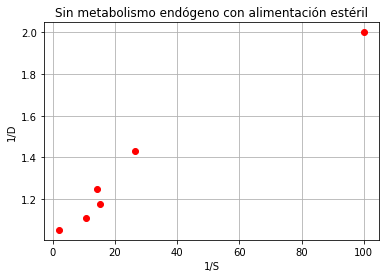

 
0.009532 x + 1.069
R^2 = 0.9664424825705655
miu máx = 0.9352059869138049
ks = 0.008914638660524244


(1.069283146165495, 0.009532272873853918)

In [8]:
#x=1/s y= 1/D
Continuo_Monod_Sinmend(1/S2,1/D2)

Y'xs = [0.31531532 0.32322827 0.3293383  0.32816589 0.32407875 0.32552767]


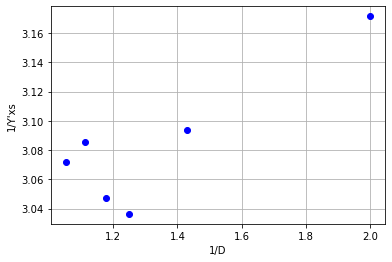

 
0.1174 x + 2.928
R^2 = 0.7340174981768994
ms= 0.11735420063029746
Yxs= 0.34158031001892397


In [11]:
yxs_NOENDOG(X2,S2,S02,D2)

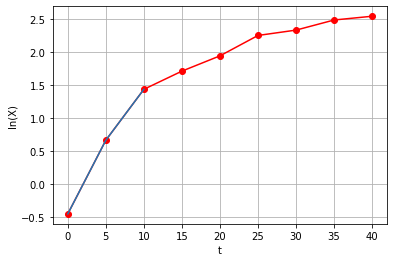

In [24]:
#punto 18) #fermentador discontinuo
t3=np.asarray([0,5,10,15,20,25,30,35,40])
X3=np.asarray([0.64,1.95,4.21,5.54,6.98,9.5,10.3,12,12.7])
S3=np.asarray([30,27.4,23.6,21,18.4,14.8,13.3,9.7,8])
plt.plot(t3,np.log(X3),"ro-")
t3ex=t3[0:3]
l3ex=np.log(X3[0:3])
plt.plot(t3ex,l3ex)
plt.xlabel("t")
plt.ylabel("ln(X)")
plt.grid()
plt.show()

In [23]:
ds3=D_fin(S3,5)
qp3=(1/X3)*dx3
qp3

array([-0.625     , -3.28205128, -1.52019002, -0.93862816, -0.88825215,
       -0.53684211, -0.49514563, -0.44166667, -0.11811024])

<ipython-input-5-681984c3d018>:74: RuntimeWarning: invalid value encountered in log
  plt.plot(t,np.log(x),"ro-")


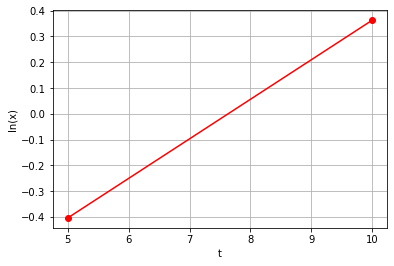

<ipython-input-5-681984c3d018>:79: RuntimeWarning: invalid value encountered in log
  Reg=np.polyfit(t,np.log(x),1)


LinAlgError: SVD did not converge in Linear Least Squares

In [30]:
t3ex=t3[0:3]
l3ex=np.log(X3[0:3])
Int_plot(t3ex,l3ex)

In [5]:
#Función para derivar por diferencias finitas 
def D_fin(x,dt):
    x=list(x)
    dx0=[(-3*x[0]+4*x[1]-x[2])/(2*dt)]
    dxf=[(x[-3]-4*x[-2]+3*x[-1])]
    k=1
    x1=[]
    for k in list(range(0,len(x)-1)):
        dxc=(x[k+1]-x[k-1])/(2*0.5)
        x1.append(dxc)
    del x1[0]
    dx0.extend(x1)
    dx0.extend(dxf)
    return np.asarray(dx0)

#ingresar 1/s y 1/mu
def Monod_reg(si,mui,n):
    #ingresar 1/s y 1/mu
    plt.plot(si,mui,"ro-")
    plt.title("Monod")
    plt.grid(True)
    plt.xlabel("1/s")
    plt.ylabel("1/mu")
    plt.show()
    Reg=np.polyfit(si,mui,n) 
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(mui,model(si))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    vmax=1/Reg[1]
    print("mu_max =",vmax)
    km=vmax*Reg[0]
    print("km =",km)
    return 

def Andrews_reg(S,SD):
    #Calculo de parametros usando el modelo de Andrews (bce biomasa en continuo)
    plt.plot(S,SD,"bo-")
    plt.title("Modelo de Andrews")
    plt.grid(True)
    plt.xlabel("S")
    plt.ylabel("S/D")
    plt.show()
    Reg=np.polyfit(S,SD,2) 
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(SD,model(S))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    vmax=1/Reg[1]
    print("mu_max =",vmax)
    ks=vmax*Reg[2]
    ki=1/(vmax*Reg[0])
    print("ks =",ks)
    print("kI =",ki)
    return 

#Función para derivar con un polinomio
def Deriv_Reg(x,t,n):
    Reg=np.polyfit(t,x,n) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(x,model(t))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    #Se realiza la derivada del polinomio
    d=np.polyder(Reg)
    #Se evalua el polinomio en t
    d_val=np.polyval(d,t)
    dermodel=np.poly1d(d)
    print(dermodel)
    print("Derivada evaluada en t: ")
    return d_val

def Int_plot(t,x):
    plt.plot(t,np.log(x),"ro-")
    plt.grid(True)
    plt.xlabel("t")
    plt.ylabel("ln(x)")
    plt.show()
    Reg=np.polyfit(t,np.log(x),1) 
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(np.log(x),model(t))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    return 

#Calcular con la definición de pendiente
def Yxs_prima(s,x):
    plt.plot(s,x,"co-")
    plt.title("Cálculo de Yxs")
    plt.xlabel("s [g/L]")
    plt.ylabel("x[g/L]")
    plt.grid("True")
    plt.show()
    #linealizar
    Regt32=np.polyfit(s,x,1) #Ajuste lineal
    model32=np.poly1d(Regt32)
    print(model32)
    R_232=r2_score(x,model32(s))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_232) 
    print("")
    print("Y'xs=")
    return -model32[1]

#1/Y'xs=1/Yxs+ms*(1/D)
def kd_yxs_endog(X,S,S_0,D):
    #Calculo para metabolismo endogeno usando Monod y el balance de biomasa
    Yxsp=(X/(S_0-S))
    print("Y'xs =",Yxsp)
    plt.plot(1/D,1/Yxsp,"bo")
    plt.grid(True)
    plt.xlabel("1/D")
    plt.ylabel("1/Y'xs")
    plt.show()
    Reg=np.polyfit(1/D,1/Yxsp,1) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(1/Yxsp,model(1/D))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    mse=model[1]
    print("ms=",mse)
    Yxs=1/model[0]
    print("Yxs=",Yxs)
    kd=Yxs*mse
    print("kd=",kd)
    return
#Y'px=Ypx+mp*(1/D)
def mp_ypx_endog(P,X,D):
    #Calculo para metabolismo endogeno usando Monod y el balance de biomasa
    Ypxp=(P/X)
    print("Y'px =",Ypxp)
    plt.plot(1/D,Ypxp,"bo")
    plt.grid(True)
    plt.xlabel("1/D")
    plt.ylabel("Y'px")
    plt.show()
    Reg=np.polyfit(1/D,Ypxp,1) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(Ypxp,model(1/D))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    mpe=model[1]
    print("mp=",mpe)
    Ypx=model[0]
    print("Ypx=",Ypx)
    return model[0],model[1]
def yxs_NOENDOG(X,S,S_0,D):
    #Calculo sin metabolismo endogeno usando Monod y el balance de biomasa
    Yxsp=(X/(S_0-S))
    print("Y'xs =",Yxsp)
    plt.plot(1/D,1/Yxsp,"bo")
    plt.grid(True)
    plt.xlabel("1/D")
    plt.ylabel("1/Y'xs")
    plt.show()
    Reg=np.polyfit(1/D,1/Yxsp,1) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(1/Yxsp,model(1/D))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23) 
    mse=model[1]
    print("ms=",mse)
    Yxs=1/model[0]
    print("Yxs=",Yxs)
    return
#x=1/s y= 1/D+kd
def Continuo_metendog(x,y):
    #Partiendo del modelo de Monod
    plt.plot(x,y,"ro")
    plt.title("Con metabolismo endógeno con alimentación estéril")
    plt.grid(True)
    plt.xlabel("1/S")
    plt.ylabel("1/D+kd")
    plt.show()
    Reg=np.polyfit(x,y,1) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(y,model(x))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23)
    mu_max=1/model[0]
    ks=mu_max*model[1]
    print('miu máx =',mu_max)
    print("ks =",ks)
    return  model[0],model[1]

#x=1/s y= 1/D
def Continuo_Monod_Sinmend(x,y):
    #Partiendo del modelo de Monod
    plt.plot(x,y,"ro")
    plt.title("Sin metabolismo endógeno con alimentación estéril")
    plt.grid(True)
    plt.xlabel("1/S")
    plt.ylabel("1/D")
    plt.show()
    Reg=np.polyfit(x,y,1) #Ajuste lineal
    model=np.poly1d(Reg)
    print(model)
    R_23=r2_score(y,model(x))#Encontramos el R^2 segun los datos 
    print("R^2 =",R_23)
    mu_max=1/model[0]
    ks=mu_max*model[1]
    print('miu máx =',mu_max)
    print("ks =",ks)
    return model[0],model[1]
